In [18]:
sum_fare_tip_gto = sum(taxi_df.taxi_data[clean_df['tip_to_fare']>1]['fare_amount'])
sum_fare_jan = sum(clean_df['fare_amount'])

perc_of_money = (sum_fare_tip_gto/sum_fare_jan)*100
perc_of_trips = (len(clean_df[clean_df['tip_to_fare']>1]['fare_amount'])/len(clean_df))*100
print(f'Trips with tip amount that exceeds the 100% price of the trip correspond to \
        {perc_of_money} of the total revenue and {perc_of_trips}')

Trips with tip amount that exceeds the 100% price of the trip correspond to         0.0 of the total revenue and 0.0


In [633]:
from shapely.geometry import LineString

In [635]:
lineGeom = []
for i in range(len(clean_df)):

    try:
        PULoc = clean_df['PULocationID'].iloc[i]
        DOLoc = clean_df['DOLocationID'].iloc[i]
    
        PUCoord = coordsDict[PULoc]
        DOCoord = coordsDict[DOLoc]
    
        lineGeom.append(LineString([PUCoord,DOCoord]))
    except:
        pass

In [636]:
lineSeries = gpd.GeoSeries(lineGeom)

<Axes: >

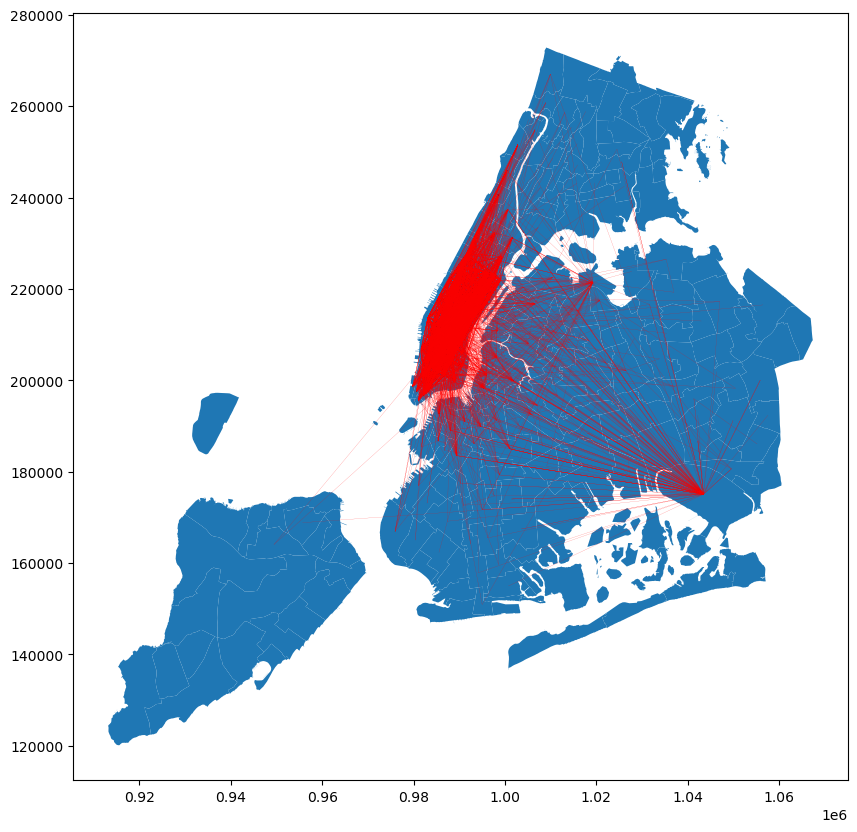

In [649]:
fig,ax = plt.subplots(figsize=(10,10))
taxi_df.taxi_zones.plot(ax=ax)
lineSeries[0:10000].plot(lw=0.1,alpha=0.9,ax=ax,color='red',zorder=10)

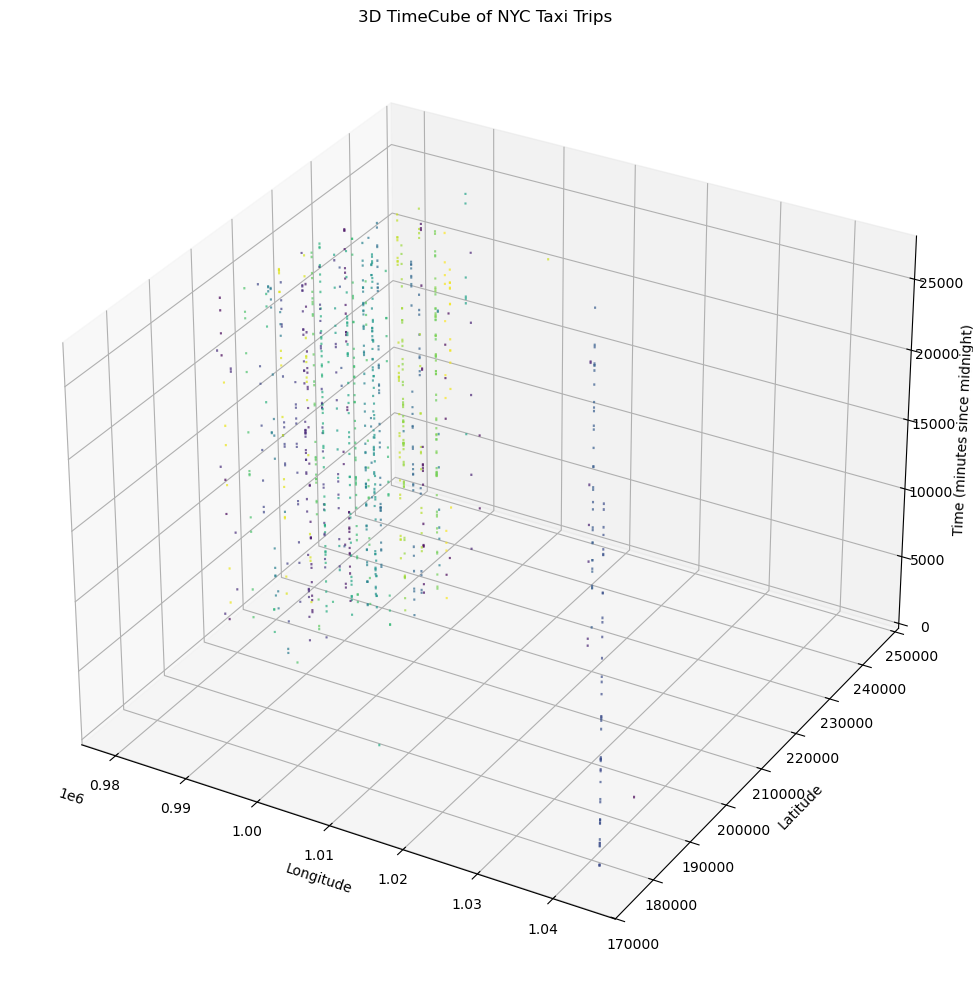

In [688]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Optional: Normalize color by time or distance
colors = cm.viridis(np.linspace(0, 1, len(groupedDf)))
sample_df = groupedDf.sample(1000)

for i, row in sample_df.iterrows():  # Sample for clarity
    xs = [row['PULong'], row['DOLong']]
    ys = [row['PULat'], row['DOLat']]
    zs = [row['pickup_time'], row['dropoff_time']]
    ax.plot(xs, ys, zs, color=colors[i % len(colors)], alpha=0.7)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Time (minutes since midnight)')
ax.set_title('3D TimeCube of NYC Taxi Trips')

plt.tight_layout()
plt.show()


In [ ]:
import json

trip_lines = []

for _, row in df.sample(1000).iterrows():  # adjust sample size as needed
    trip_lines.append({
        "start": [row['pickup_lon'], row['pickup_lat'], row['pickup_time']],
        "end": [row['dropoff_lon'], row['dropoff_lat'], row['dropoff_time']]
    })

with open("trips.json", "w") as f:
    json.dump(trip_lines, f)

In [661]:
start_time = clean_df['tpep_pickup_datetime'].min()

clean_df['pickup_time'] = (clean_df['tpep_pickup_datetime'] - start_time).dt.total_seconds() / 60.0
clean_df['dropoff_time'] = (clean_df['tpep_dropoff_datetime'] - start_time).dt.total_seconds() / 60.0

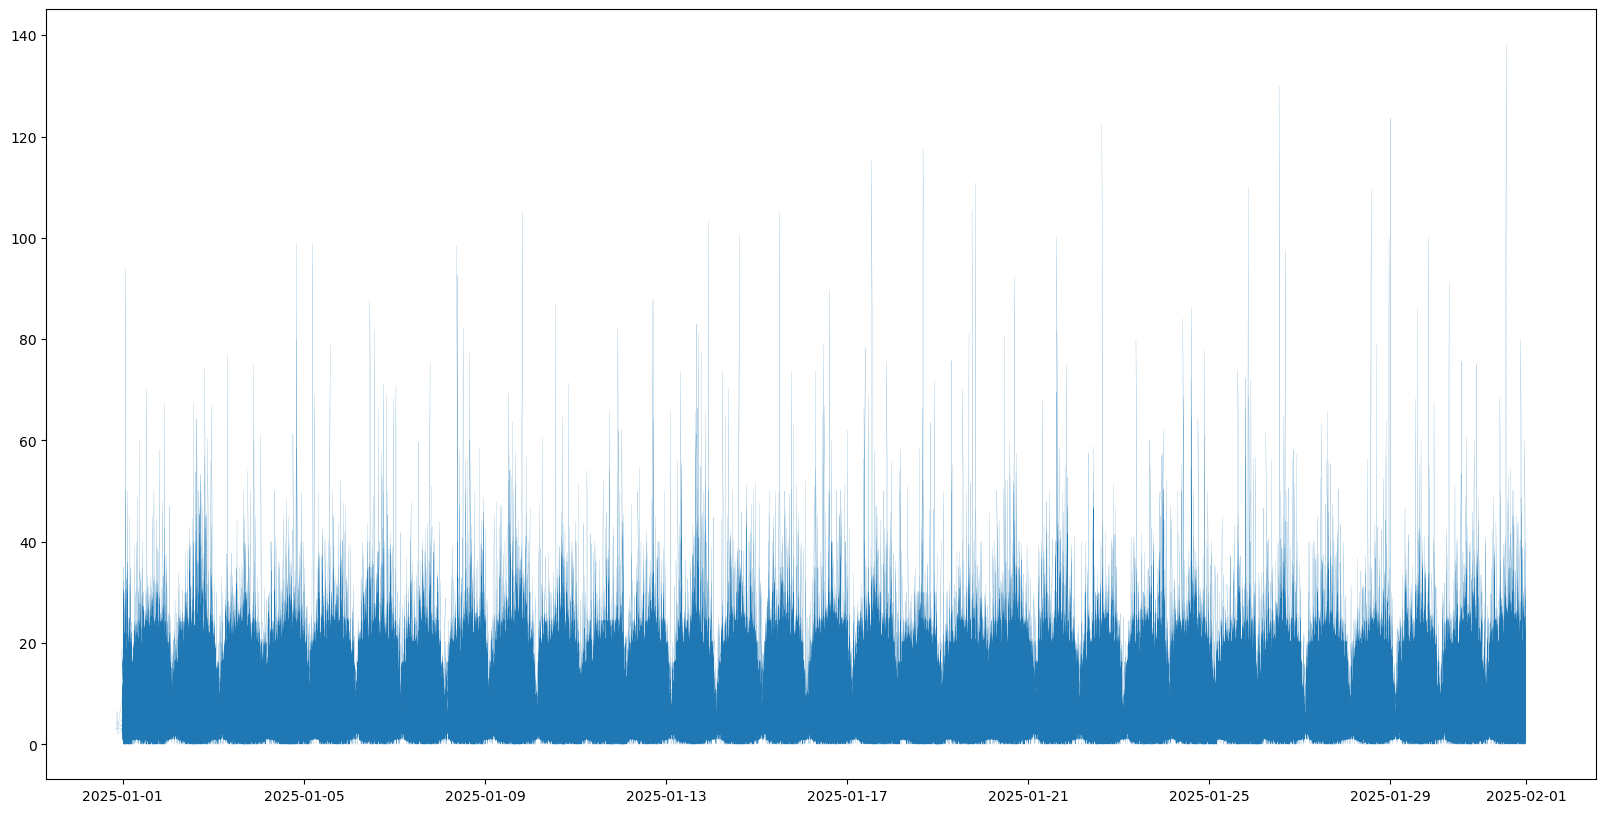

In [451]:
fig,avx = plt.subplots(figsize=(20,10))
plt.plot(clean_df['tpep_pickup_datetime'],clean_df['tip_amount'],lw=0.1)

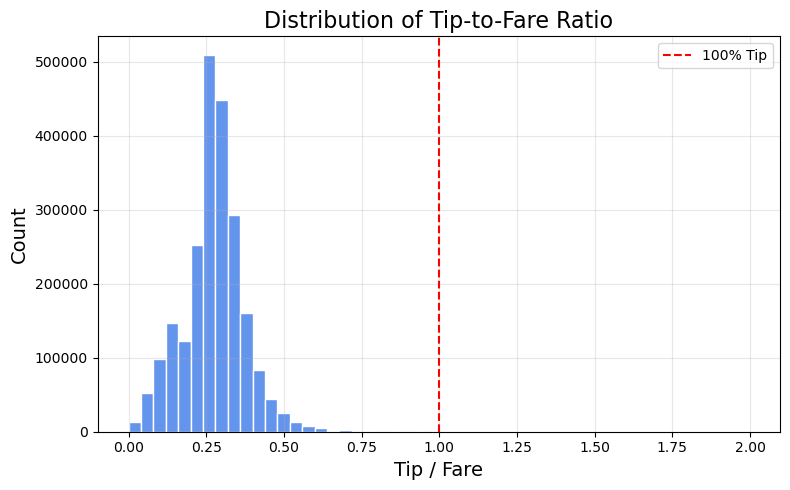

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(clean_df['tip_to_fare'], bins=50, color='cornflowerblue', edgecolor='white')
plt.title("Distribution of Tip-to-Fare Ratio", fontsize=16)
plt.xlabel("Tip / Fare", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.axvline(1.0, color='red', linestyle='--', label='100% Tip')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

(array([1.11320e+04, 2.61540e+04, 1.01991e+05, 2.12180e+04, 1.91800e+03,
        2.63000e+02, 1.02000e+02, 7.50000e+01, 3.30000e+01, 3.70000e+01]),
 array([3.73692078e-05, 9.88478615e-02, 1.97658354e-01, 2.96468846e-01,
        3.95279339e-01, 4.94089831e-01, 5.92900323e-01, 6.91710816e-01,
        7.90521308e-01, 8.89331800e-01, 9.88142292e-01]),
 <BarContainer object of 10 artists>)

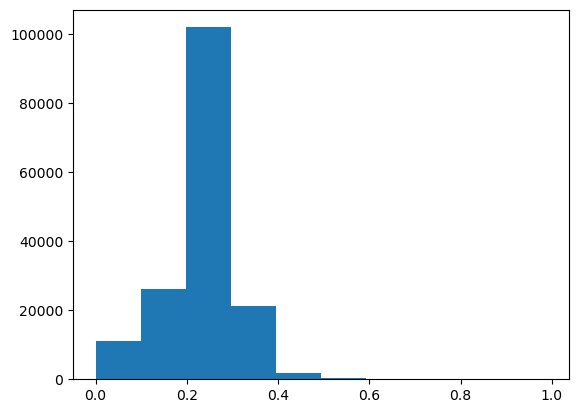

In [102]:
plt.hist(clean_df[clean_df['Airport_fee']>0]['tip_to_fare'])

(array([ 90150., 304443., 897117., 641425., 141124.,  32497.,   8170.,
          2400.,   1375.,    905.]),
 array([6.45161290e-05, 9.96659077e-02, 1.99267299e-01, 2.98868691e-01,
        3.98470082e-01, 4.98071474e-01, 5.97672865e-01, 6.97274257e-01,
        7.96875648e-01, 8.96477040e-01, 9.96078431e-01]),
 <BarContainer object of 10 artists>)

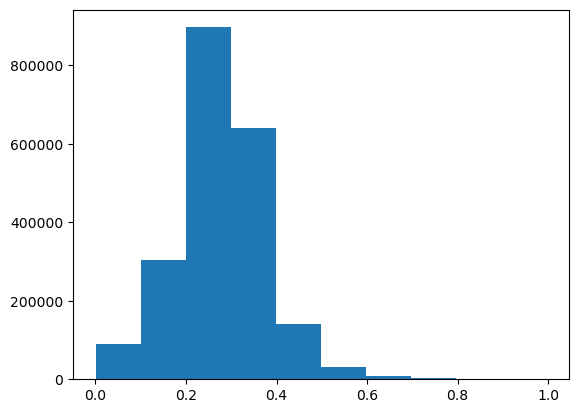

In [103]:
plt.hist(clean_df[clean_df['Airport_fee']==0]['tip_to_fare'])

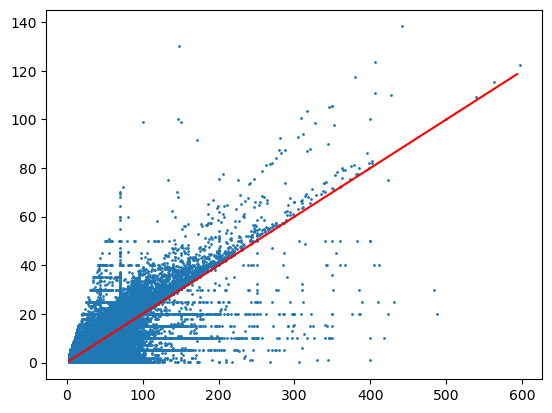

In [192]:
sub_10 = clean_df.query('tip_to_fare<1')
sorted_values = sub_10.sort_values('fare_amount')
vals = sorted_values['tip_amount']
h_vals = sorted_values['fare_amount']

# plt.axhline(vals.mean(), color='green', linestyle='--', label='100% Tip')
# plt.axhline(np.log(0.1), color='red', linestyle='--', label='100% Tip')
# plt.axhline(np.log(0.2), color='orange', linestyle='--', label='100% Tip')
# plt.axhline(np.log(0.3), color='cyan', linestyle='--', label='100% Tip')


plt.scatter(h_vals,vals,s=1)
dummy_x = np.arange(min(h_vals),max(h_vals),10)
plt.plot(dummy_x,dummy_x*0.20,c='red')